<a href="https://colab.research.google.com/github/Sultan-manjur/BME/blob/main/pure_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os                       # OS is for interfacing your own operative system
import pandas as pd             # Pandas is for data analysis and structure manipulation
import matplotlib               # MatPlotLib is for making plots & figures
import matplotlib.pyplot as plt # PyPlot is a subset of the library for making MATLAB-style plots
import h5py
fid = h5py.File(r"dataset_patchcamelyon.h5")
X, Y = fid['X'][:], fid['Y'][:]
X = X / 255.
fid.close()
Y=Y.reshape(-1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True, stratify=Y)
#x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,shuffle=True, stratify=Y_train)

In [ ]:
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization
from keras.models import Model,Sequential
import keras.layers as layers
import tensorflow as tf
import keras

import numpy as np
def cnn_model(n_hidden=1, activ='relu', input_sh=(96,96,3)):  # Parameter Optimization
    cnn_clf = keras.models.Sequential()
    cnn_clf.add(keras.layers.Conv2D(32,(3,3),strides=1,padding='Same',activation=activ,input_shape=input_sh))
    cnn_clf.add(keras.layers.MaxPool2D(2,2))
    cnn_clf.add(keras.layers.BatchNormalization())
    for layer in range(n_hidden):
        
        cnn_clf.add(keras.layers.Conv2D((layer+1)*64,(3,3), strides=1,padding= 'Same', activation=activ))
        cnn_clf.add(keras.layers.MaxPool2D(2,2))
        cnn_clf.add(keras.layers.BatchNormalization())


    cnn_clf.add(keras.layers.Flatten())
    cnn_clf.add(keras.layers.Dense(512, activation = activ))
    cnn_clf.add(keras.layers.Dropout(0.2))
    cnn_clf.add(keras.layers.Dense(256, activation = activ))
    cnn_clf.add(keras.layers.Dropout(0.2)),
    cnn_clf.add(keras.layers.Dense(1, activation = "sigmoid"))
    opt= tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    cnn_clf.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    
    return cnn_clf

# create a wrapper to use the DNN as any other classifier in scikit-learn
clftemp = keras.wrappers.scikit_learn.KerasClassifier(cnn_model)
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                 patience=3, 
                                 verbose=0, 
                                 factor=0.5, 
                                 min_lr=0.000001)
# set the range of parameters to test
param_distribs = {
    "n_hidden": [ 2,3,4],
    'activ':['relu','selu','tanh']
    
}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
search_cv = RandomizedSearchCV(clftemp, param_distribs, n_iter = 3, cv=3, verbose=0, n_jobs=1)
earlystop_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
# run the grid search
search_cv.fit(x_train,y_train,
              epochs = 50,
              validation_data = (x_test, y_test),
              verbose = 0,
              callbacks=[lr_reduction,earlystop_cb])

21/21 [==============================] - 1s 25ms/step - loss: 0.4223 - accuracy: 0.8408


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff8d3b2c190>,
                   n_iter=3, n_jobs=1,
                   param_distributions={'activ': ['relu', 'selu', 'tanh'],
                                        'n_hidden': [2, 3, 4]})

In [ ]:
print(search_cv.best_params_)

{'n_hidden': 4, 'activ': 'selu'}


In [ ]:
print(search_cv.best_score_)

0.7849828799565634


Epoch 1/20
63/63 [==============================] - ETA: 0s - loss: 2.3593 - accuracy: 0.6595
Epoch 1: val_accuracy improved from -inf to 0.64200, saving model to CNN_model_histo.keras
63/63 [==============================] - 5s 51ms/step - loss: 2.3593 - accuracy: 0.6595 - val_loss: 3.4254 - val_accuracy: 0.6420 - lr: 0.0010
Epoch 2/20
63/63 [==============================] - ETA: 0s - loss: 1.7070 - accuracy: 0.7065
Epoch 2: val_accuracy did not improve from 0.64200
63/63 [==============================] - 2s 39ms/step - loss: 1.7070 - accuracy: 0.7065 - val_loss: 2.1286 - val_accuracy: 0.5960 - lr: 0.0010
Epoch 3/20
63/63 [==============================] - ETA: 0s - loss: 1.1696 - accuracy: 0.7150
Epoch 3: val_accuracy did not improve from 0.64200
63/63 [==============================] - 2s 39ms/step - loss: 1.1696 - accuracy: 0.7150 - val_loss: 1.2549 - val_accuracy: 0.4540 - lr: 5.0000e-04
Epoch 4/20
63/63 [==============================] - ETA: 0s - loss: 0.6543 - accuracy: 0.786

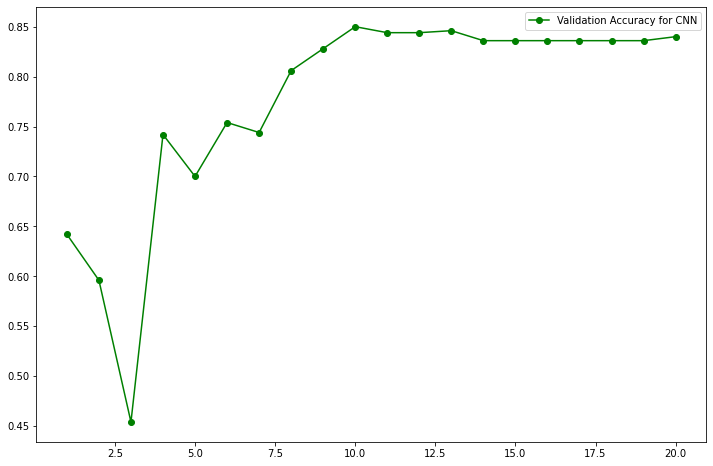

In [ ]:
opt= tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)

model=keras.models.Sequential([
                       keras.layers.Conv2D(32,(3,3),strides=1,padding='Same',activation='selu',input_shape=(96,96,3)),
                       keras.layers.MaxPool2D(2,2),
                       keras.layers.BatchNormalization(),
                       keras.layers.Conv2D(64,(3,3), strides=1,padding= 'Same', activation='selu'),
                       keras.layers.MaxPool2D(2,2),
                       keras.layers.BatchNormalization(),
                       keras.layers.Conv2D(128,(3,3), strides=1,padding= 'Same', activation='selu'),
                       keras.layers.MaxPool2D(2,2),
                       keras.layers.BatchNormalization(),
                       keras.layers.Conv2D(256,(3,3), strides=1,padding= 'Same', activation='selu'),
                       keras.layers.MaxPool2D(2,2),
                       keras.layers.BatchNormalization(),
                       keras.layers.Conv2D(512,(3,3), strides=1,padding= 'Same', activation='selu'),
                       keras.layers.MaxPool2D(2,2),
                       keras.layers.BatchNormalization(),
                       keras.layers.Flatten(),
                       keras.layers.Dense(512, activation = 'selu'),
                       keras.layers.Dropout(0.2),
                       keras.layers.Dense(256, activation = 'selu'),
                       keras.layers.Dropout(0.2),
                       keras.layers.Dense(1, activation = "sigmoid")
])
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                 patience=1, 
                                 verbose=0, 
                                 factor=0.5, 
                                 min_lr=0.000001)
model.compile(loss="binary_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

earlystop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
from tensorflow.keras.callbacks import ModelCheckpoint
model_dir = 'CNN_model_histo.keras'
checkpoint = ModelCheckpoint(model_dir, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')
training2 = model.fit(x_train, y_train, epochs=20,verbose=1,
                      validation_data=(x_test, y_test),callbacks=[checkpoint,lr_reduction])
accuracy_score2 = training2.history.get('val_accuracy')
plt.figure(figsize=(12,8))
plt.plot(range(1,len(accuracy_score2)+1), accuracy_score2, color='g', marker='o',label='Validation Accuracy for CNN')
plt.legend()

In [ ]:
from tensorflow import keras
model= keras.models.load_model("/content/CNN_model_histo.keras")

In [ ]:
score = model.evaluate(x_test,y_test,verbose=1)
print(score[1])

16/16 [==============================] - 1s 17ms/step - loss: 0.4164 - accuracy: 0.8500
0.8500000238418579


In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 96, 96, 32)        896       
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_54 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_65 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                     

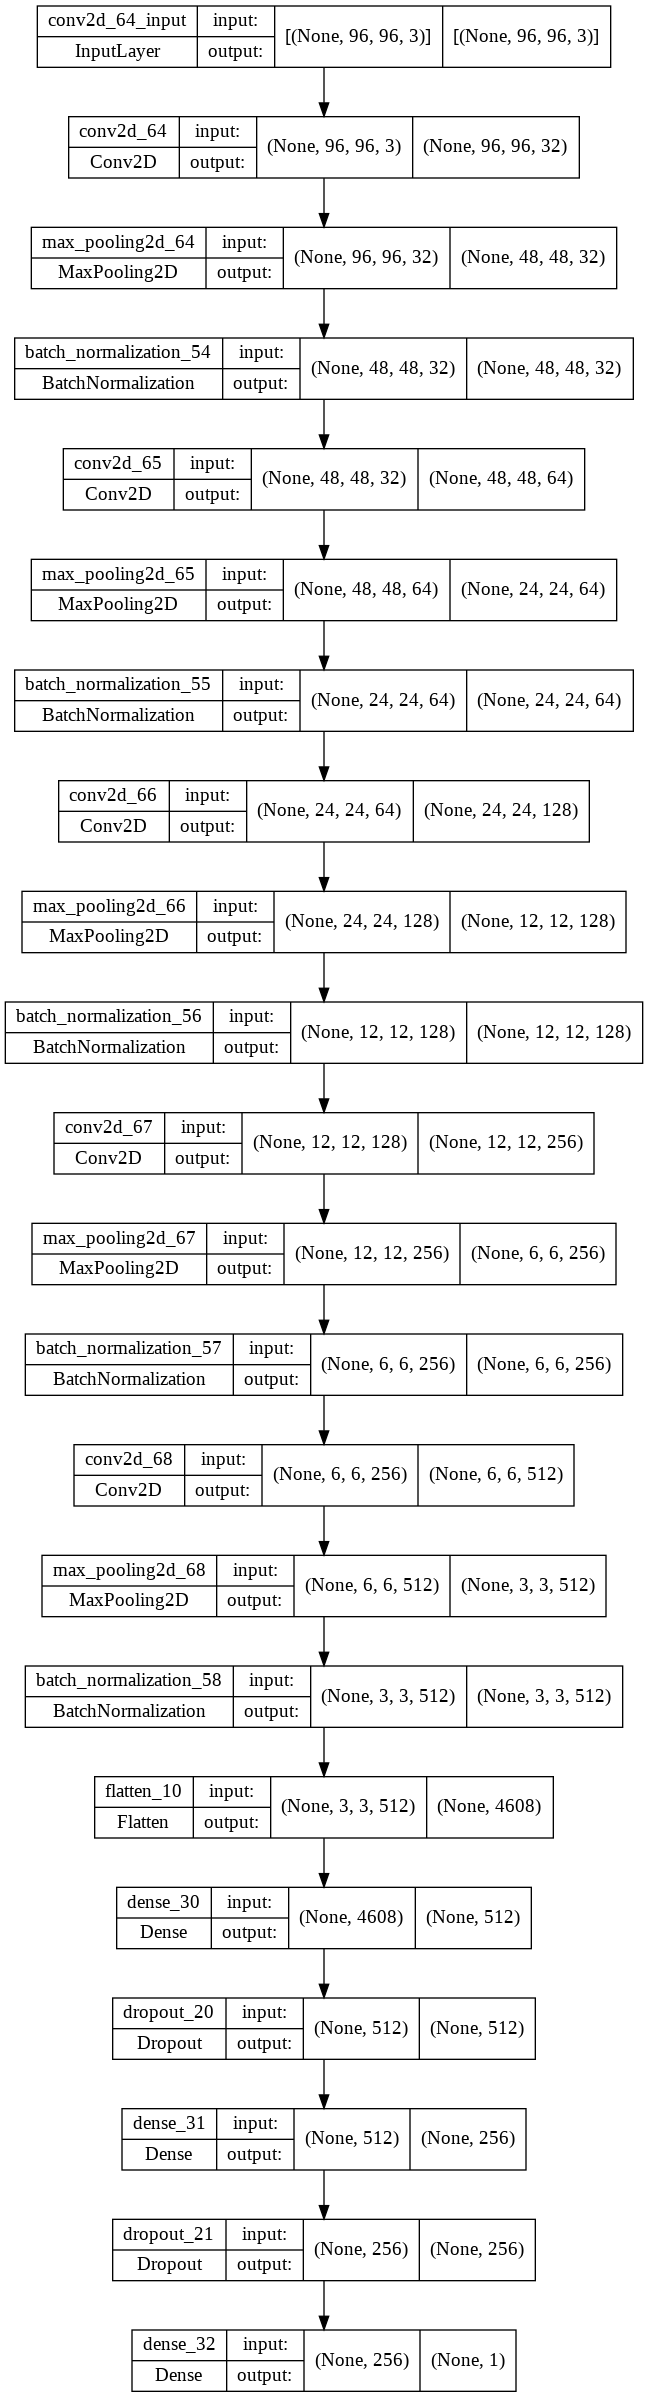

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
pred=model.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,np.round(pred)))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       237
           1       0.83      0.89      0.86       263

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



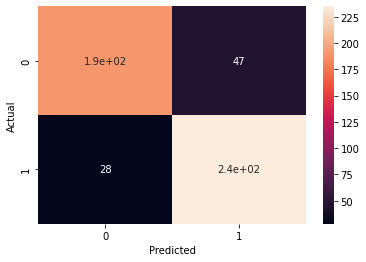

In [ ]:
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, np.round(pred))

plt.figure(figsize=(6,4))
seaborn.heatmap(conf_mat, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

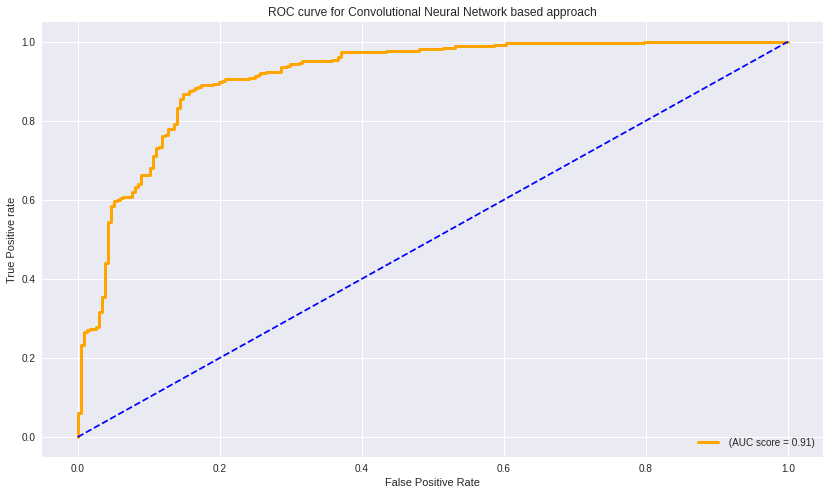

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
fpr, tpr, T = roc_curve(y_test,pred)
auc_score = roc_auc_score(y_test, pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr,color='orange', linewidth=3.0, label=r' (AUC score = %0.2f)' % (auc_score) )
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve for Convolutional Neural Network based approach')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Now I will use pretrained network 